Saving file_00000000dbe4623084bd691f1c207e1b_conversation_id=67fc2e3b-3b50-8001-aa82-3af90e20ecbe&message_id=a1179b3d-d1d6-41c0-8845-c6328a84deb2.png to file_00000000dbe4623084bd691f1c207e1b_conversation_id=67fc2e3b-3b50-8001-aa82-3af90e20ecbe&message_id=a1179b3d-d1d6-41c0-8845-c6328a84deb2 (1).png


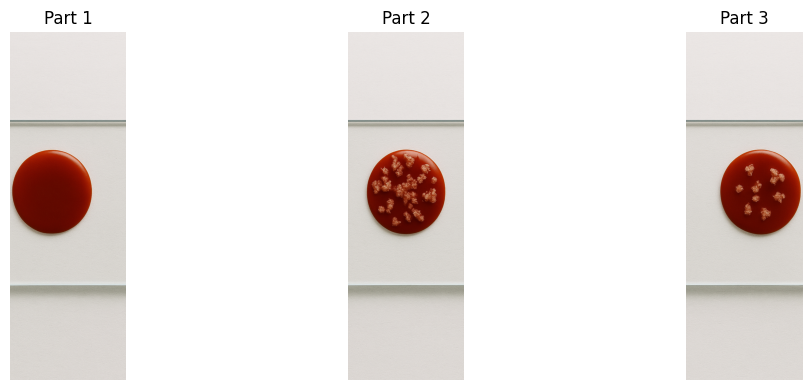

In [5]:
from PIL import Image
import matplotlib.pyplot as plt

# Step 1: Upload the image
from google.colab import files
uploaded = files.upload()

# Step 2: Load image using PIL
image_name = list(uploaded.keys())[0]
img = Image.open(image_name)

# Step 3: Get image dimensions
width, height = img.size

# Step 4: Compute width of each part (divide into 3 equal vertical sections)
part_width = width // 3

# Step 5: Crop and save each part
parts = []
for i in range(3):
    left = i * part_width
    right = (i + 1) * part_width if i < 2 else width  # ensure last part covers remaining
    cropped = img.crop((left, 0, right, height))
    part_path = f"/content/sample_data/hii/red_dot_part_{i+1}.png"
    cropped.save(part_path)
    parts.append(part_path)

# Step 6: Show the 3 parts
fig, axs = plt.subplots(1, 3, figsize=(12, 4))
for i, part in enumerate(parts):
    axs[i].imshow(Image.open(part))
    axs[i].set_title(f"Part {i+1}")
    axs[i].axis('off')
plt.tight_layout()
plt.show()


In [6]:
import os
from PIL import Image

# Path to the folder containing images
input_folder = '/content/sample_data/hii'   # Change this to your image folder
output_folder = '/content/resized_images'  # Output path

# Desired size
target_size = (256, 256)

# Create the output folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

# Resize and save each image
for filename in os.listdir(input_folder):
    if filename.endswith(('.jpg', '.png', '.jpeg', '.bmp')):
        img_path = os.path.join(input_folder, filename)
        img = Image.open(img_path)
        img_resized = img.resize(target_size)
        img_resized.save(os.path.join(output_folder, filename))

print("✅ All images resized and saved to:", output_folder)


✅ All images resized and saved to: /content/resized_images


Found 200 images belonging to 2 classes.
Found 44 images belonging to 2 classes.
Epoch 1/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 23s 3s/step - accuracy: 0.4714 - loss: 1.2633 - val_accuracy: 0.5000 - val_loss: 0.7340 - learning_rate: 1.0000e-04
Epoch 2/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 640ms/step - accuracy: 0.5312 - loss: 0.7766 - val_accuracy: 0.4375 - val_loss: 0.7366 - learning_rate: 1.0000e-04
Epoch 3/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 23s 4s/step - accuracy: 0.5314 - loss: 0.7571 - val_accuracy: 0.5000 - val_loss: 0.6962 - learning_rate: 1.0000e-04
Epoch 4/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 9s 275ms/step - accuracy: 0.6562 - loss: 0.6772 - val_accuracy: 0.4688 - val_loss: 0.6976 - learning_rate: 1.0000e-04
Epoch 5/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 20s 4s/step - accuracy: 0.4726 - loss: 0.7684 - val_accuracy: 0.5000 - val_loss: 0.6996 - learning_rate: 1.0000e-04
Epoch 6/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 205ms/step - accuracy: 0.4688 - loss: 0.7131 - val_accuracy: 0.5312 - val_loss: 0.6956 - learning_rate: 1.0000e-04
E

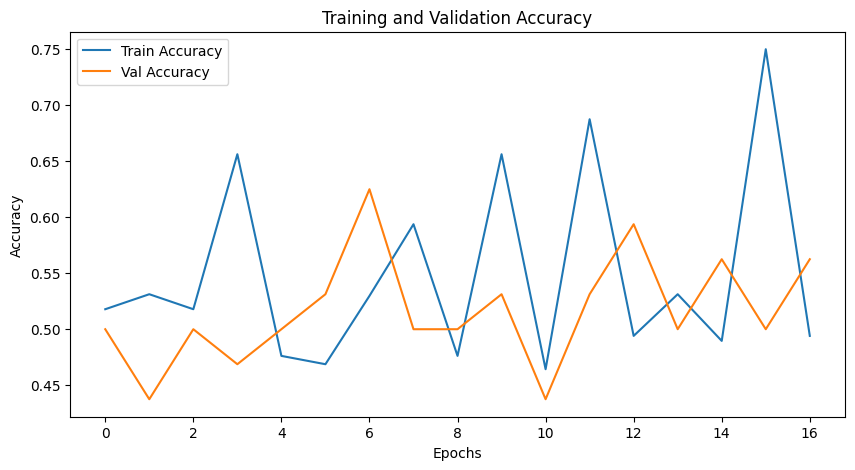

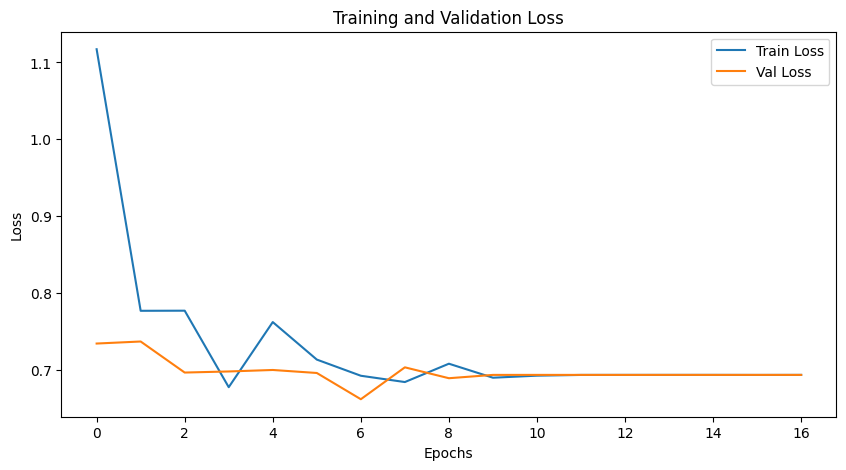

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 241ms/step
Confusion Matrix:
 [[ 0 22]
 [ 0 22]]


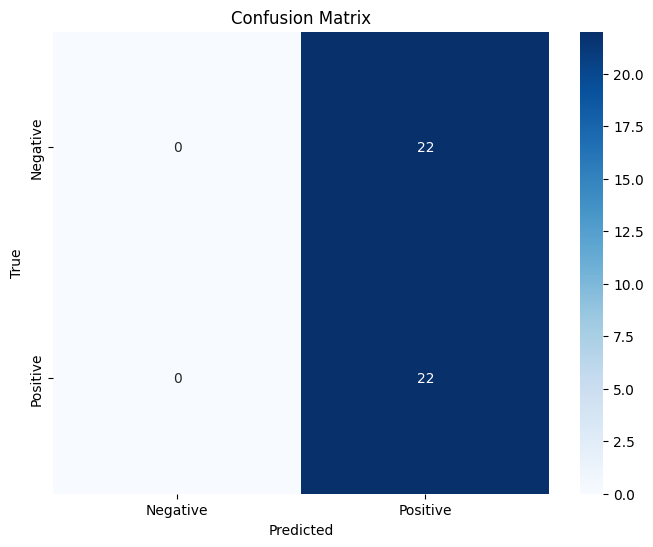

Classification Report:
               precision    recall  f1-score   support

    Negative       0.00      0.00      0.00        22
    Positive       0.50      1.00      0.67        22

    accuracy                           0.50        44
   macro avg       0.25      0.50      0.33        44
weighted avg       0.25      0.50      0.33        44



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [57]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import seaborn as sns
import os

# Set path to your dataset
dataset_path = '/content/drive/MyDrive/blood'

# Data generators with augmentation
# The training data is augmented to increase the model's generalization ability
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

# Validation data is not augmented, only rescaled
validation_datagen = ImageDataGenerator(rescale=1./255)

# Define the image size
image_size = (256, 256)

# Prepare training data
train_generator = train_datagen.flow_from_directory(
    dataset_path + '/train',  # Folder with the training data
    target_size=image_size,   # Resize images
    batch_size=32,            # Batch size for training
    class_mode='binary'       # Binary classification (positive/negative)
)

# Prepare validation data
validation_generator = validation_datagen.flow_from_directory(
    dataset_path + '/validation',  # Folder with the validation data
    target_size=image_size,        # Resize images
    batch_size=32,                 # Batch size for validation
    class_mode='binary'            # Binary classification (positive/negative)
)

# Build the CNN model with additional regularization (Dropout)
model = Sequential([
    # First convolutional layer with 16 filters and a 3x3 kernel
    Conv2D(16, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    MaxPooling2D(2, 2),  # Max pooling layer to reduce spatial dimensions
    # Second convolutional layer with 32 filters
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),  # Max pooling to reduce dimensions
    Flatten(),           # Flatten the output for the fully connected layer
    Dense(128, activation='relu'),  # Fully connected layer
    Dropout(0.6),  # Dropout for regularization to reduce overfitting
    Dense(1, activation='sigmoid')  # Output layer with sigmoid for binary classification
])

# Compile the model using Adam optimizer with a small learning rate
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
              loss='binary_crossentropy',  # Loss function for binary classification
              metrics=['accuracy'])  # Evaluation metric

# Set up callbacks for early stopping and learning rate reduction
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

# Train the model with training and validation data
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,  # Number of batches per epoch
    epochs=30,  # Increase epochs to 30 or higher
    validation_data=validation_generator,  # Validation data
    validation_steps=validation_generator.samples // validation_generator.batch_size,  # Number of batches for validation
    callbacks=[early_stopping, reduce_lr]  # Callbacks for early stopping and learning rate adjustment
)

# Save the trained model
model.save('/content/blood_model_final.h5')

# Plot the training and validation accuracy over epochs
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy')  # Plot training accuracy
plt.plot(history.history['val_accuracy'], label='Val Accuracy')  # Plot validation accuracy
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('/content/training_validation_accuracy.png')  # Save the plot as an image
plt.show()

# Plot the training and validation loss over epochs
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss')  # Plot training loss
plt.plot(history.history['val_loss'], label='Val Loss')  # Plot validation loss
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig('/content/training_validation_loss.png')  # Save the plot as an image
plt.show()

# Evaluate the model on the validation data
y_true = validation_generator.classes  # Ground truth labels (actual labels)
y_pred = model.predict(validation_generator)  # Predicted labels
y_pred = (y_pred > 0.5).astype(int)  # Convert probabilities to binary labels (0 or 1)

# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:\n", cm)

# Save the confusion matrix plot
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.savefig('/content/confusion_matrix.png')  # Save confusion matrix plot as an image
plt.show()

# Print classification report (Precision, Recall, F1-score)
report = classification_report(y_true, y_pred, target_names=['Negative', 'Positive'])
print("Classification Report:\n", report)

# Save the classification report to a text file
with open('/content/classification_report.txt', 'w') as f:
    f.write(report)


In [62]:
!pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.9/46.9 MB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.2/322.2 kB 22.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 108.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 4.1 MB/s eta 0:00:00


In [63]:
import os
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

# Load the trained model
model = load_model('/content/drive/MyDrive/blood_model_improved3.h5')

# Folder containing exactly 3 images
folder_path = '/content/resized_images/'
image_size = (256, 256)

# Load and preprocess the first 3 images
img_names = sorted(os.listdir(folder_path))[:3]
img_paths = [os.path.join(folder_path, fname) for fname in img_names]

predictions = []

for img_path in img_paths:
    img = image.load_img(img_path, target_size=image_size)
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    pred = model.predict(img_array, verbose=0)[0][0]
    predictions.append(1 if pred > 0.5 else 0)  # 1 = Positive, 0 = Negative

# Apply your custom rule
first, second, third = predictions
if first and second:
    result = "AB"
elif first:
    result = "A"
elif second:
    result = "B"
else:
    result = "O"

result += " Positive" if third else " Negative"

# Final output
print(f"Predicted values for {img_names}: {predictions} (1 = Positive, 0 = Negative)")
print("Final Output Label:", result)


Predicted values for ['red_dot_part_1.png', 'red_dot_part_2.png', 'red_dot_part_3.png']: [0, 1, 1] (1 = Positive, 0 = Negative)
Final Output Label: B Positive
